In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Minor Project
## Hate Speech detection
### Singlechannel CNN using word embedding (2 hidden layers)

In [91]:
import numpy as np
import pandas as pd
import sklearn
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from sklearn import feature_extraction,model_selection
from sklearn.metrics import confusion_matrix
import glob
import os
import string
import tensorflow as tf
import keras as K
import zipfile
from itertools import chain
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/Colab Notebooks/hate-speech-dataset-master.zip", 'r')
zip_ref.extractall()
zip_ref.close()
file_path="/content/hate-speech-dataset-master/all_files"

In [93]:
read_files=glob.glob(os.path.join(file_path,"*.txt"))
data=[]
file_name=[]
for files in read_files:
    with open(files,encoding='utf-8') as f:
        data.append(f.read())
        file_name.append(os.path.splitext(os.path.basename(files))[0])
data=pd.DataFrame(data,index=file_name)
data.head()

0
13595072_4  Þá var Persaflóastríðið og miklir umbrotatímar...
14111061_2  I 'm all alone and looking for companionship ,...
30412407_2  https : //www.youtube.com/watch ? v = DeiW _ b...
14078237_2             No wonder this races achieve nothing .
12861583_2            Officials are puzzled as to the cause .

In [94]:
Output=pd.read_csv("/content/hate-speech-dataset-master/annotations_metadata.csv",index_col=0)
Output=Output.drop(['user_id','subforum_id','num_contexts'],axis=1).sort_index()
Output.head()

label
file_id            
12834217_1   noHate
12834217_10  noHate
12834217_2   noHate
12834217_3   noHate
12834217_4     hate

In [95]:
dataSet=pd.merge(data,Output,how='outer',left_index=True,right_index=True)
dataSet=dataSet[(dataSet['label']=="noHate")|(dataSet['label']=='hate')]
dataSet.rename(columns={0:'Texts'},inplace=True)
dataSet['label']=(dataSet['label']=='hate').astype(int)
dataSet.head()

Texts  label
12834217_1   As of March 13th , 2014 , the booklet had been...      0
12834217_10  Thank you in advance. : ) Download the youtube...      0
12834217_2   In order to help increase the booklets downloa...      0
12834217_3   ( Simply copy and paste the following text int...      0
12834217_4   Click below for a FREE download of a colorfull...      1

In [0]:
import re
import string
def clean_text(text):
  text=text.lower()
  text=re.sub('\[.*?\]','',text)
  text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
  text=re.sub('\w*\d\w*','',text)
  return text

In [97]:
dataSet['Texts']=dataSet.apply(lambda x:clean_text(x['Texts']),axis=1)
dataSet

Texts  label
12834217_1   as of march     the booklet had been downloade...      0
12834217_10  thank you in advance   download the youtube  d...      0
12834217_2   in order to help increase the booklets downloa...      0
12834217_3    simply copy and paste the following text into...      0
12834217_4   click below for a free download of a colorfull...      1
...                                                        ...    ...
33677015_1   apparently he came to the conclusion that his ...      0
33677019_1   wish we at least had a marine le pen to vote f...      0
33677019_2   its like the choices are white genocide candid...      0
33677053_1   why white people used to say that sex was a si...      1
33677053_2                                       now i get it       0

[10703 rows x 2 columns]

In [98]:
train_text,test_text,train_y,test_y=sklearn.model_selection.train_test_split(dataSet['Texts'],dataSet['label'],test_size=0.09)
print(train_text,'\n',train_y)
print(test_text,'\n',test_y)
print(test_y.shape,train_y.shape)

14106678_1    duetschgirltx no i live in a tiny ass town whe...
14104294_2                                   live in peoria  az
14267446_7    it became that way because years and years ago...
14034693_1    every time i see a black security guard they a...
30785993_2            a racist is someone who loves their race 
                                    ...                        
13945988_3    growing up with our many children  the other k...
14021695_2    i noticed a lot of fat little white girls with...
14104937_3                                        gott mit uns 
14088896_3    i have been trying to find a job but the mexic...
30496437_1    facebook account helps me fo example if im not...
Name: Texts, Length: 9739, dtype: object 
 14106678_1    1
14104294_2    0
14267446_7    0
14034693_1    1
30785993_2    0
             ..
13945988_3    0
14021695_2    1
14104937_3    0
14088896_3    1
30496437_1    0
Name: label, Length: 9739, dtype: int64
13845891_1    and the poles decide to

In [0]:
def create_tokens(lines):
  #stop_words = set(nltk.corpus.stopwords.words('english'))
  t_line=lines.apply(lambda x: nltk.word_tokenize(x))
  #t_line=t_line.apply(lambda x: [w for w in x if not w in stop_words])
  return t_line

In [100]:
train_lines=create_tokens(train_text)
print(train_lines)
tokenizer= Tokenizer()
tokenizer.fit_on_texts(train_lines)
tokenizer

14106678_1    [duetschgirltx, no, i, live, in, a, tiny, ass,...
14104294_2                               [live, in, peoria, az]
14267446_7    [it, became, that, way, because, years, and, y...
14034693_1    [every, time, i, see, a, black, security, guar...
30785993_2    [a, racist, is, someone, who, loves, their, race]
                                    ...                        
13945988_3    [growing, up, with, our, many, children, the, ...
14021695_2    [i, noticed, a, lot, of, fat, little, white, g...
14104937_3                                     [gott, mit, uns]
14088896_3    [i, have, been, trying, to, find, a, job, but,...
30496437_1    [facebook, account, helps, me, fo, example, if...
Name: Texts, Length: 9739, dtype: object


In [0]:
def encode_text(tokenizer, lines, length):
  encoded = tokenizer.texts_to_sequences(lines)
  padded = pad_sequences(encoded, maxlen=length, padding='post')
  return padded

In [102]:
length=np.max(train_lines.apply(lambda x:len(x)))
length

329

In [0]:
train_x=encode_text(tokenizer,train_lines,length)
pd.DataFrame(train_x).to_csv("train_file.csv")

In [104]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

14395

In [105]:
import keras.engine.input_layer as ki
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
def define_model(length,vocab_size):
  # channel 1
  inputs1 = ki.Input(shape=(length,))
  embedding1 = Embedding(vocab_size, 100)(inputs1)
  conv1 = Conv1D(filters=32, kernel_size=4, activation='tanh')(embedding1)
  drop1 = Dropout(0.3)(conv1)
  pool1 = MaxPooling1D(pool_size=2)(drop1)
  conv2 = Conv1D(filters=64, kernel_size=3, activation='tanh')(pool1)
  drop2 = Dropout(0.3)(conv2)
  pool2 = MaxPooling1D(pool_size=2)(drop2)
  flat1 = Flatten()(pool2)
  # merge
  merged = flat1
  # interpretation
  dense1 = Dense(10, activation='tanh')(merged)
  outputs = Dense(1, activation='sigmoid')(dense1)
  model = Model(inputs=inputs1, outputs=outputs)
  # compile
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  # summarize
  #print(model.summary())
  return model
model=define_model(length,vocab_size)
model.fit([train_x],np.array(train_y),epochs=40,batch_size=128,validation_split=0.1)

Train on 8765 samples, validate on 974 samples
Epoch 1/40
8765/8765 [==============================] - 2s 180us/step - loss: 0.3561 - acc: 0.8863 - val_loss: 0.3975 - val_acc: 0.8819
Epoch 2/40
8765/8765 [==============================] - 1s 76us/step - loss: 0.2847 - acc: 0.8972 - val_loss: 0.2843 - val_acc: 0.8943
Epoch 3/40
8765/8765 [==============================] - 1s 73us/step - loss: 0.1602 - acc: 0.9417 - val_loss: 0.2886 - val_acc: 0.8943
Epoch 4/40
8765/8765 [==============================] - 1s 77us/step - loss: 0.0855 - acc: 0.9736 - val_loss: 0.3338 - val_acc: 0.8891
Epoch 5/40
8765/8765 [==============================] - 1s 73us/step - loss: 0.0472 - acc: 0.9873 - val_loss: 0.3608 - val_acc: 0.8922
Epoch 6/40
8765/8765 [==============================] - 1s 72us/step - loss: 0.0276 - acc: 0.9930 - val_loss: 0.3941 - val_acc: 0.8768
Epoch 7/40
8765/8765 [==============================] - 1s 75us/step - loss: 0.0205 - acc: 0.9956 - val_loss: 0.4150 - val_acc: 0.9004
Epoch 8

In [106]:
test_lines=create_tokens(test_text)
test_x=encode_text(tokenizer,test_lines,length)
pd.DataFrame(test_x).to_csv("test_file.csv")
scores = model.evaluate([test_x], test_y, verbose=0)
print(scores)

[0.7857002840991831, 0.8817427385892116]


In [107]:
yhat=model.predict([test_x],batch_size=100,verbose=1,use_multiprocessing=True)
yhat=(yhat>=0.5).astype(int)
tdf=pd.DataFrame(yhat).rename(columns={0:'Prediction'})
tdf.to_csv("op.csv")

964/964 [==============================] - 0s 245us/step


In [108]:
i=399
print(test_text[i])
print(yhat[i])
print(test_y[i])

i especially like the news stories told unpc 
[0]
0


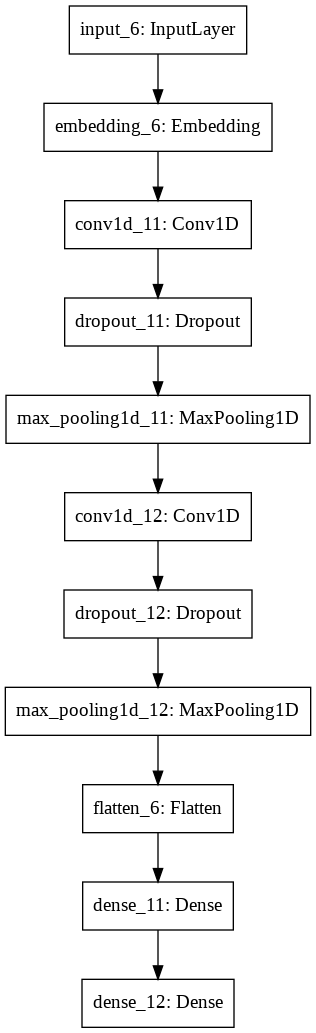

In [109]:
plot_model(model)

In [110]:
m=confusion_matrix(y_pred=yhat, y_true=test_y, labels=[1,0])
nm=confusion_matrix(y_pred=yhat, y_true=test_y, labels=[1,0],normalize='true')
print(m)
print(nm)

[[ 47  79]
 [ 35 803]]
[[0.37301587 0.62698413]
 [0.04176611 0.95823389]]


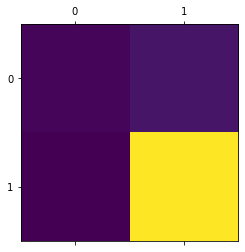

In [111]:
fig=plt.figure().add_subplot()
fig.matshow(m)

In [113]:
print(sklearn.metrics.classification_report(test_y, yhat, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       838
           1       0.57      0.37      0.45       126

    accuracy                           0.88       964
   macro avg       0.74      0.67      0.69       964
weighted avg       0.87      0.88      0.87       964

